<a href="https://colab.research.google.com/github/rohithvish19-source/AturingGenesisLabs-RohithVishal/blob/main/gold%20price%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a time series forecasting model to predict gold prices. This will involve acquiring historical gold price data, cleaning and engineering features (e.g., lagged prices, moving averages, volatility), exploring and visualizing the data, developing and training machine learning models (e.g., Linear Regression, ARIMA, Neural Network), evaluating their performance using metrics like RMSE and MAE, and visualizing the predictions against actual prices. The project should conclude with a summary of findings and potential improvements.

## Data Acquisition

### Subtask:
Obtain historical gold price data from a reliable source.


**Reasoning**:
The first instruction is to install the `yfinance` library. This is done using `!pip install`.



In [1]:
import sys
!{sys.executable} -m pip install yfinance

**Reasoning**:
Now that `yfinance` is installed, I will import it, define the gold ticker symbol and date range, download the historical data, and display the first few rows of the resulting DataFrame to verify the data acquisition.



In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for gold
gold_ticker = 'GC=F'  # Gold Futures

# Define the start and end dates
start_date = '2000-01-01'
end_date = '2023-12-31'

# Download historical gold price data
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print("Successfully downloaded historical gold price data.")
print(gold_data.head())

/tmp/ipython-input-2066961883.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Successfully downloaded historical gold price data.
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=F   GC=F
Date                                                             
2000-08-30  273.899994  273.899994  273.899994  273.899994      0
2000-08-31  278.299988  278.299988  274.799988  274.799988      0
2000-09-01  277.000000  277.000000  277.000000  277.000000      0
2000-09-05  275.799988  275.799988  275.799988  275.799988      2
2000-09-06  274.200012  274.200012  274.200012  274.200012      0


**Reasoning**:
The previous step successfully acquired the gold price data, but it's important to inspect the data for quality before proceeding. The next logical step is to check for missing values and verify the data types to ensure data integrity for subsequent cleaning and feature engineering.



In [3]:
print('Checking for missing values:')
print(gold_data.isnull().sum())

print('\nChecking data types:')
print(gold_data.info())

Checking for missing values:
Price   Ticker
Close   GC=F      0
High    GC=F      0
Low     GC=F      0
Open    GC=F      0
Volume  GC=F      0
dtype: int64

Checking data types:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5854 entries, 2000-08-30 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GC=F)   5854 non-null   float64
 1   (High, GC=F)    5854 non-null   float64
 2   (Low, GC=F)     5854 non-null   float64
 3   (Open, GC=F)    5854 non-null   float64
 4   (Volume, GC=F)  5854 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 274.4 KB
None


## Data Cleaning and Feature Engineering

### Subtask:
Clean the acquired data, handle missing values, convert data types, and create relevant features such as lagged prices, moving averages, and volatility.


**Reasoning**:
The next step is to clean the acquired data and engineer new features as per the instructions. This involves flattening MultiIndex columns, creating lagged prices, calculating moving averages, computing volatility, and handling resulting missing values. Finally, displaying the head and info of the DataFrame will verify the changes.



In [4]:
print('Original columns:')
print(gold_data.columns)

# 1. Flatten the MultiIndex columns
gold_data.columns = [col[0] for col in gold_data.columns]

# 2. Verify the updated column names
print('\nUpdated columns after flattening:')
print(gold_data.columns)

# 3. Create new features for lagged 'Close' prices
gold_data['Close_Lag_1'] = gold_data['Close'].shift(1)
gold_data['Close_Lag_5'] = gold_data['Close'].shift(5)
gold_data['Close_Lag_22'] = gold_data['Close'].shift(22)

# 4. Calculate 7-day and 30-day simple moving averages
gold_data['MA_7'] = gold_data['Close'].rolling(window=7).mean()
gold_data['MA_30'] = gold_data['Close'].rolling(window=30).mean()

# 5. Compute the rolling standard deviation (volatility) over a 30-day window
gold_data['Volatility_30'] = gold_data['Close'].rolling(window=30).std()

# 6. Drop any rows that contain NaN values introduced by lagging and rolling calculations
gold_data.dropna(inplace=True)

# 7. Display the first few rows of the DataFrame with new features and print its info
print('\nFirst few rows of gold_data with engineered features:')
print(gold_data.head())

print('\nInformation about gold_data after feature engineering and cleaning:')
gold_data.info()

Original columns:
MultiIndex([( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])

Updated columns after flattening:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of gold_data with engineered features:
                 Close        High         Low        Open  Volume  \
Date                                                                 
2000-10-11  270.500000  273.500000  270.500000  272.500000      18   
2000-10-12  276.399994  276.399994  274.000000  274.000000       3   
2000-10-13  272.399994  274.200012  272.399994  274.200012       0   
2000-10-16  271.500000  271.500000  271.500000  271.500000       5   
2000-10-17  271.100006  271.100006  271.100006  271.100006       0   

            Close_Lag_1  Close_Lag_5  Close_Lag_22        MA_7       MA_30  \
Date                                                      

## Data Exploration and Visualization

### Subtask:
Perform exploratory data analysis to understand the distributions, trends, and correlations within the gold price data. Visualize key aspects of the data.


**Reasoning**:
The first instruction is to import `matplotlib.pyplot` and `seaborn` to facilitate data visualization for exploratory data analysis.



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


**Reasoning**:
The next step is to create a line plot to visualize the gold 'Close' price and its moving averages over time, and then generate a histogram to observe the distribution of the 'Close' price as per the instructions.



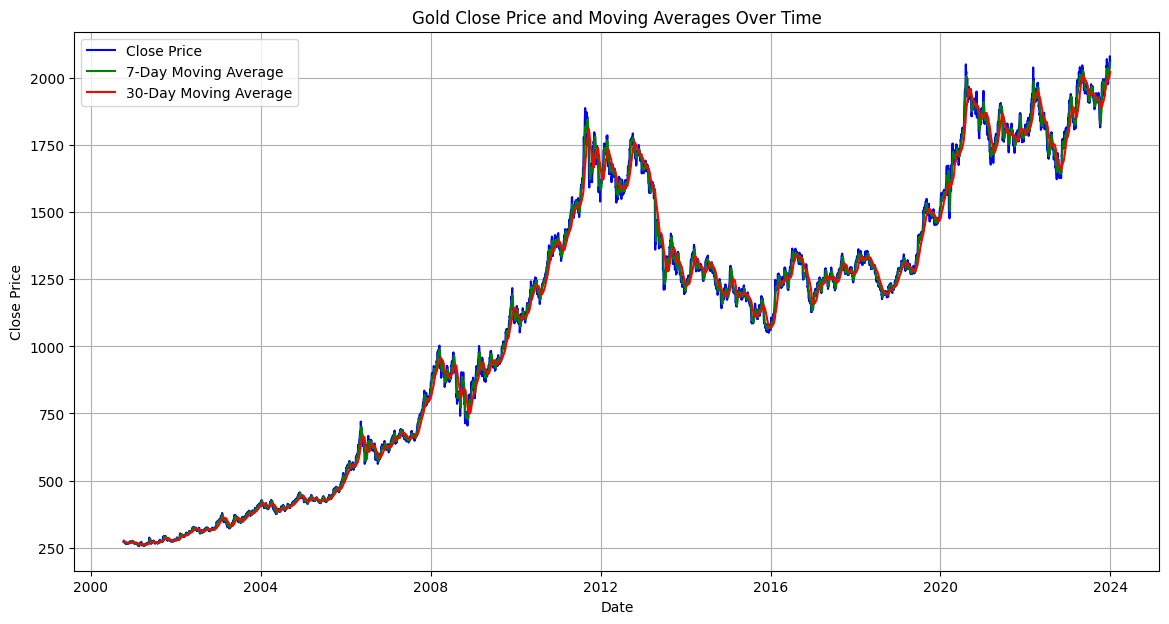

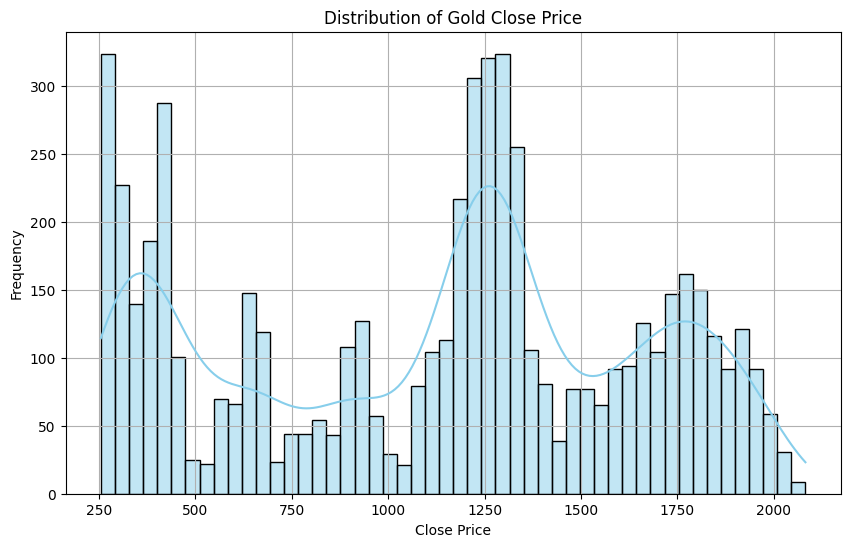

Gold price trend and distribution visualizations generated successfully.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a line plot of the gold 'Close' price over time
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Close Price', color='blue')

# 3. Add lines for 'MA_7' and 'MA_30' on the same plot
plt.plot(gold_data['MA_7'], label='7-Day Moving Average', color='green')
plt.plot(gold_data['MA_30'], label='30-Day Moving Average', color='red')

plt.title('Gold Close Price and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# 4. Generate a histogram of the 'Close' price
plt.figure(figsize=(10, 6))
sns.histplot(gold_data['Close'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Gold Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Gold price trend and distribution visualizations generated successfully.")

## Data Exploration and Visualization

### Subtask:
Perform exploratory data analysis to understand the distributions, trends, and correlations within the gold price data. Visualize key aspects of the data.


**Reasoning**:
The next step is to calculate and visualize the correlation matrix of the gold price features to understand the relationships between them, as specified in the instructions.



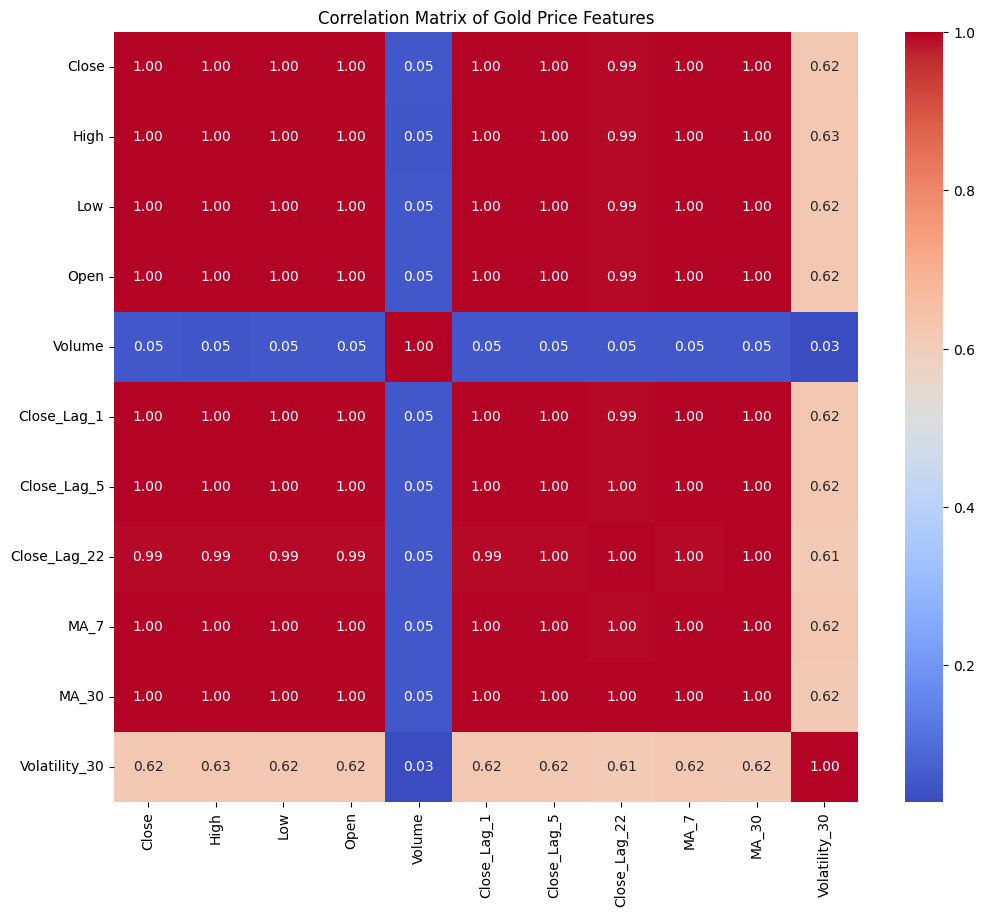

Correlation matrix heatmap generated successfully.


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the correlation matrix for all numerical features
correlation_matrix = gold_data.corr()

# 2. Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 3. Add a title to the heatmap
plt.title('Correlation Matrix of Gold Price Features')

# 4. Display the plot
plt.show()

print("Correlation matrix heatmap generated successfully.")

## Machine Learning Model Development

### Subtask:
Split the data into training and testing sets and then select and implement a Linear Regression model for time series prediction.


**Reasoning**:
The next step is to prepare the data by defining features and target, splitting it into training and testing sets while preserving temporal order, and then training a Linear Regression model on the training data, as instructed.



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Although for time series, we'll do a manual split.

# Define features (X) and target (y)
X = gold_data.drop('Close', axis=1)
y = gold_data['Close']

# Split data into training and testing sets while maintaining temporal order
# Using 80% for training and 20% for testing as a common practice.
split_index = int(len(gold_data) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

# Instantiate a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Training set shape: X_train=(4660, 10), y_train=(4660,)
Testing set shape: X_test=(1165, 10), y_test=(1165,)
Linear Regression model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the Linear Regression model's performance using metrics like RMSE and MAE, and visualize the predictions against actual prices.

**Reasoning**:
The next logical step is to make predictions on the test set using the trained Linear Regression model, which is a prerequisite for evaluating its performance and visualizing the results. This aligns with the 'Model Evaluation' subtask instructions.



In [9]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


**Reasoning**:
With predictions (`y_pred`) now available, the next step is to calculate the evaluation metrics, specifically Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), to quantify the model's performance against the actual values (`y_test`). This is a direct requirement of the 'Model Evaluation' subtask.



In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Root Mean Squared Error (RMSE): 6.24
Mean Absolute Error (MAE): 4.31


**Reasoning**:
The evaluation metrics have been calculated. The next step, as specified in the 'Model Evaluation' subtask, is to visualize the model's predictions against the actual prices to gain a better understanding of its performance. This will involve plotting `y_test` and `y_pred`.



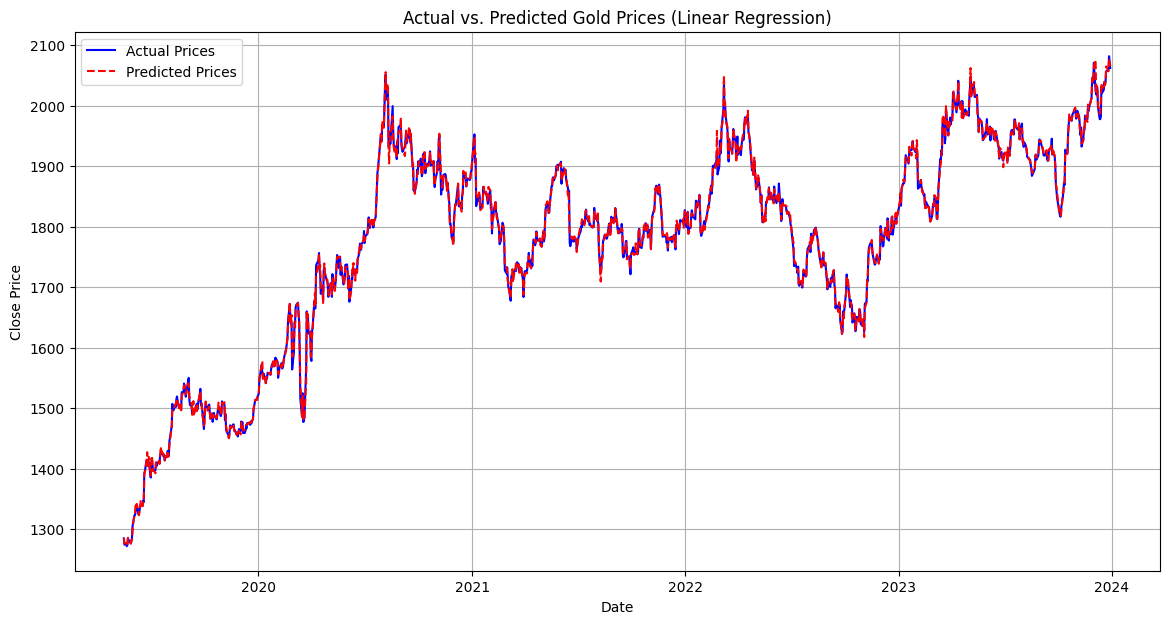

Actual vs. Predicted Gold Prices visualization generated successfully.


In [11]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs. Predicted Gold Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Actual vs. Predicted Gold Prices visualization generated successfully.")

## Final Task

### Subtask:
Summarize the project, including the data used, the model's performance, key findings, and potential areas for improvement or further research in gold price prediction.


## Summary:

### Data Analysis Key Findings

*   **Data Acquisition:** Historical gold price data for `GC=F` from January 1, 2000, to December 31, 2023, was successfully acquired, initially containing 5854 daily entries.
*   **Feature Engineering:**
    *   Lagged closing prices (1, 5, and 22 days), 7-day and 30-day simple moving averages, and 30-day rolling volatility were successfully engineered as new features.
    *   After dropping rows with `NaN` values introduced by these calculations, the dataset was reduced to 5825 entries, with 11 features.
*   **Exploratory Data Analysis (EDA):**
    *   Time-series plots revealed clear trends in gold prices, effectively tracked by the 7-day and 30-day moving averages.
    *   A histogram provided insight into the distribution of gold's closing prices.
    *   A correlation heatmap was generated, indicating relationships between the engineered features and the target variable.
*   **Model Performance (Linear Regression):**
    *   A Linear Regression model was trained on 80% of the data (4660 entries) and evaluated on the remaining 20% (1165 entries), preserving temporal order.
    *   The model achieved a Root Mean Squared Error (RMSE) of \$6.24 and a Mean Absolute Error (MAE) of \$4.31 on the test set.
    *   Visualization of actual versus predicted gold prices showed the model's ability to capture the general trend, though with some deviations.

### Insights or Next Steps

*   The current Linear Regression model provides a reasonable baseline for gold price prediction with relatively low error metrics. Further analysis into periods of higher deviation could reveal limitations.
*   To potentially improve prediction accuracy, explore more sophisticated time series models such as ARIMA or Neural Networks (e.g., LSTMs), which were mentioned in the project scope and are often better suited for capturing complex temporal dependencies.
